# Testing different optimizers: RMSprop

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import to_categorical
np.random.seed(1671)

/Users/tari/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10
OPTIMIZER = RMSprop()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2
DROPOUT = 0.3

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
RESHAPED = 784

In [5]:
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [6]:
X_train /= 255
X_test /= 255

In [7]:
print(X_train.shape[0], ' training samples')
print(X_test.shape[0], ' testing samples')

60000  training samples
10000  testing samples


In [8]:
y_train = to_categorical(y_train, NB_CLASSES)
y_test = to_categorical(y_test, NB_CLASSES)

In [21]:
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape = (RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(rate=DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(rate=DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
__________

In [10]:
model.compile(optimizer=OPTIMIZER, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE,
                    epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 9s 191us/step - loss: 0.4770 - acc: 0.8572 - val_loss: 0.1846 - val_acc: 0.9448
Epoch 2/20
48000/48000 [==============================] - 10s 202us/step - loss: 0.2265 - acc: 0.9327 - val_loss: 0.1384 - val_acc: 0.9595
Epoch 3/20
48000/48000 [==============================] - 6s 130us/step - loss: 0.1748 - acc: 0.9475 - val_loss: 0.1194 - val_acc: 0.9663
Epoch 4/20
48000/48000 [==============================] - 6s 127us/step - loss: 0.1513 - acc: 0.9545 - val_loss: 0.1149 - val_acc: 0.9665
Epoch 5/20
48000/48000 [==============================] - 8s 158us/step - loss: 0.1344 - acc: 0.9601 - val_loss: 0.1044 - val_acc: 0.9700
Epoch 6/20
48000/48000 [==============================] - 12s 260us/step - loss: 0.1239 - acc: 0.9625 - val_loss: 0.0989 - val_acc: 0.9719
Epoch 7/20
48000/48000 [==============================] - 11s 237us/step - loss: 0.1122 - acc: 0.9667 - val_loss: 0.1001

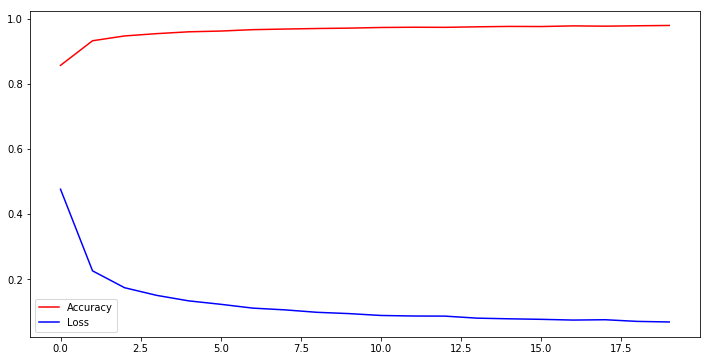

In [11]:
plt.figure(figsize=(12,6))
plt.plot(history.history['acc'], color = 'red', label = 'Accuracy' )
plt.plot(history.history['loss'], color = 'blue', label = 'Loss')
plt.legend()

In [12]:
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print('Test score {}'.format(score[0]))
print('Test accuracy {}'.format(score[1]))

10000/10000 [==============================] - 2s 203us/step
Test score 0.09446694221262296
Test accuracy 0.9783


## Ploting Loss and Accuracy for train and test

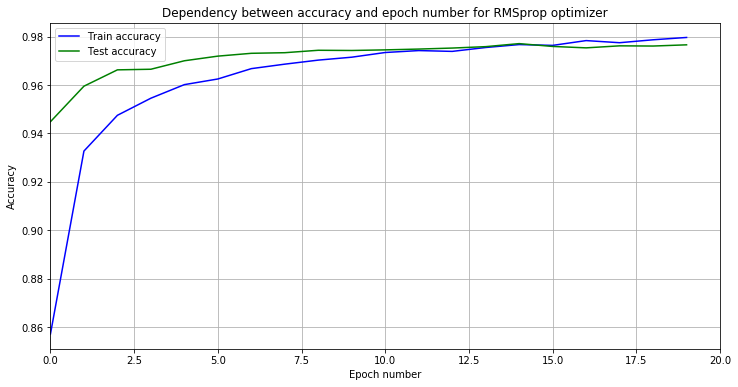

In [13]:
plt.figure(figsize=(12,6))
plt.plot(history.history['acc'], color = 'blue', label = 'Train accuracy')
plt.plot(history.history['val_acc'], color = 'green', label = 'Test accuracy')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.xlim(0,20)
plt.title('Dependency between accuracy and epoch number for RMSprop optimizer')
plt.grid()
plt.legend()

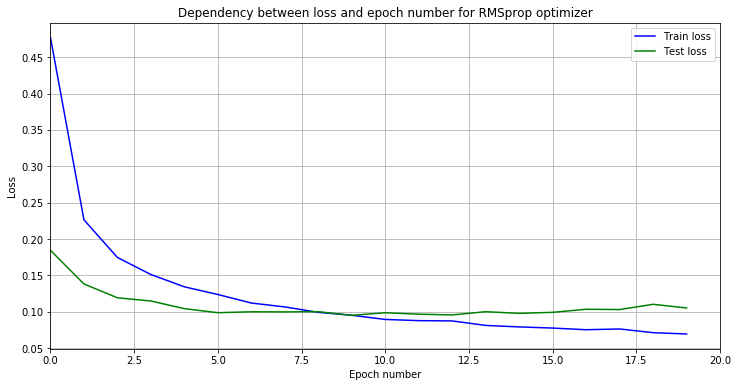

In [14]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], color = 'blue', label = 'Train loss')
plt.plot(history.history['val_loss'], color = 'green', label = 'Test loss')
plt.xlabel('Epoch number')
plt.xlim(0,20)
plt.ylabel('Loss')
plt.title('Dependency between loss and epoch number for RMSprop optimizer')
plt.grid()
plt.legend()

# Visualization

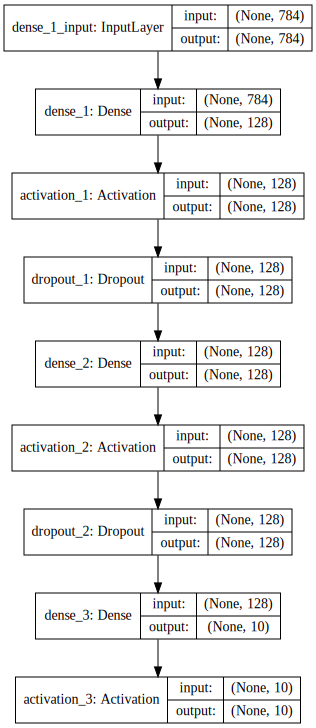

In [15]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [19]:
from quiver_engine import server
server.launch(model,temp_folder='./', port=9999)